# Conjunto de dados para classificação de faixa salarial

## Definição do Problema

O dataset involve a predição se a pessoa ganha anualmente um valor maior que 50 mil. O data set pode ser encontrado em: <https://archive.ics.uci.edu/ml/datasets/Adult>

É um problema de classificação binário (2-classes). O número de observações para cada classe não é balanceado. Existem 48842 observações com 15 variáveis. Lista de atributos: 

0. class: >50K, <=50K. 

1. age: continuous. 
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
3. fnlwgt: continuous. 
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
5. education-num: continuous. 
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
10. sex: Female, Male. 
11. capital-gain: continuous. 
12. capital-loss: continuous. 
13. hours-per-week: continuous. 
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.:

### Importação das bibliotecas

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

### Carregando e definindo as colunas do dataset

In [3]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
           'class']
data = pd.read_csv('adult_data_set.csv',names=columns)

### Visualização e descrição dos dados

In [4]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
data = data.replace(' ?', np.nan)
data = data.drop(['native-country'], axis=1)
data = data.dropna(how='any')

In [7]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,46033.000000,4.603300e+04,46033.000000,46033.000000,46033.000000,46033.000000
mean,38.556601,1.898051e+05,10.128929,1114.332653,88.729346,40.948407
std,13.204268,1.054747e+05,2.564064,7589.571484,405.316932,12.011069
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783530e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.378650e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
print(data.shape)

(46033, 14)


In [10]:
print(data.groupby('class').size())

class
 <=50K     23068
 <=50K.    11543
 >50K       7650
 >50K.      3772
dtype: int64


In [11]:
mapa = {
 ' <=50K.' : 0,
 ' <=50K'  : 0,
 ' >50K.'  : 1,
 ' >50K'   : 1
}

In [12]:
data['class'] = data['class'].map(mapa)
print(data.groupby('class').size())

class
0    34611
1    11422
dtype: int64


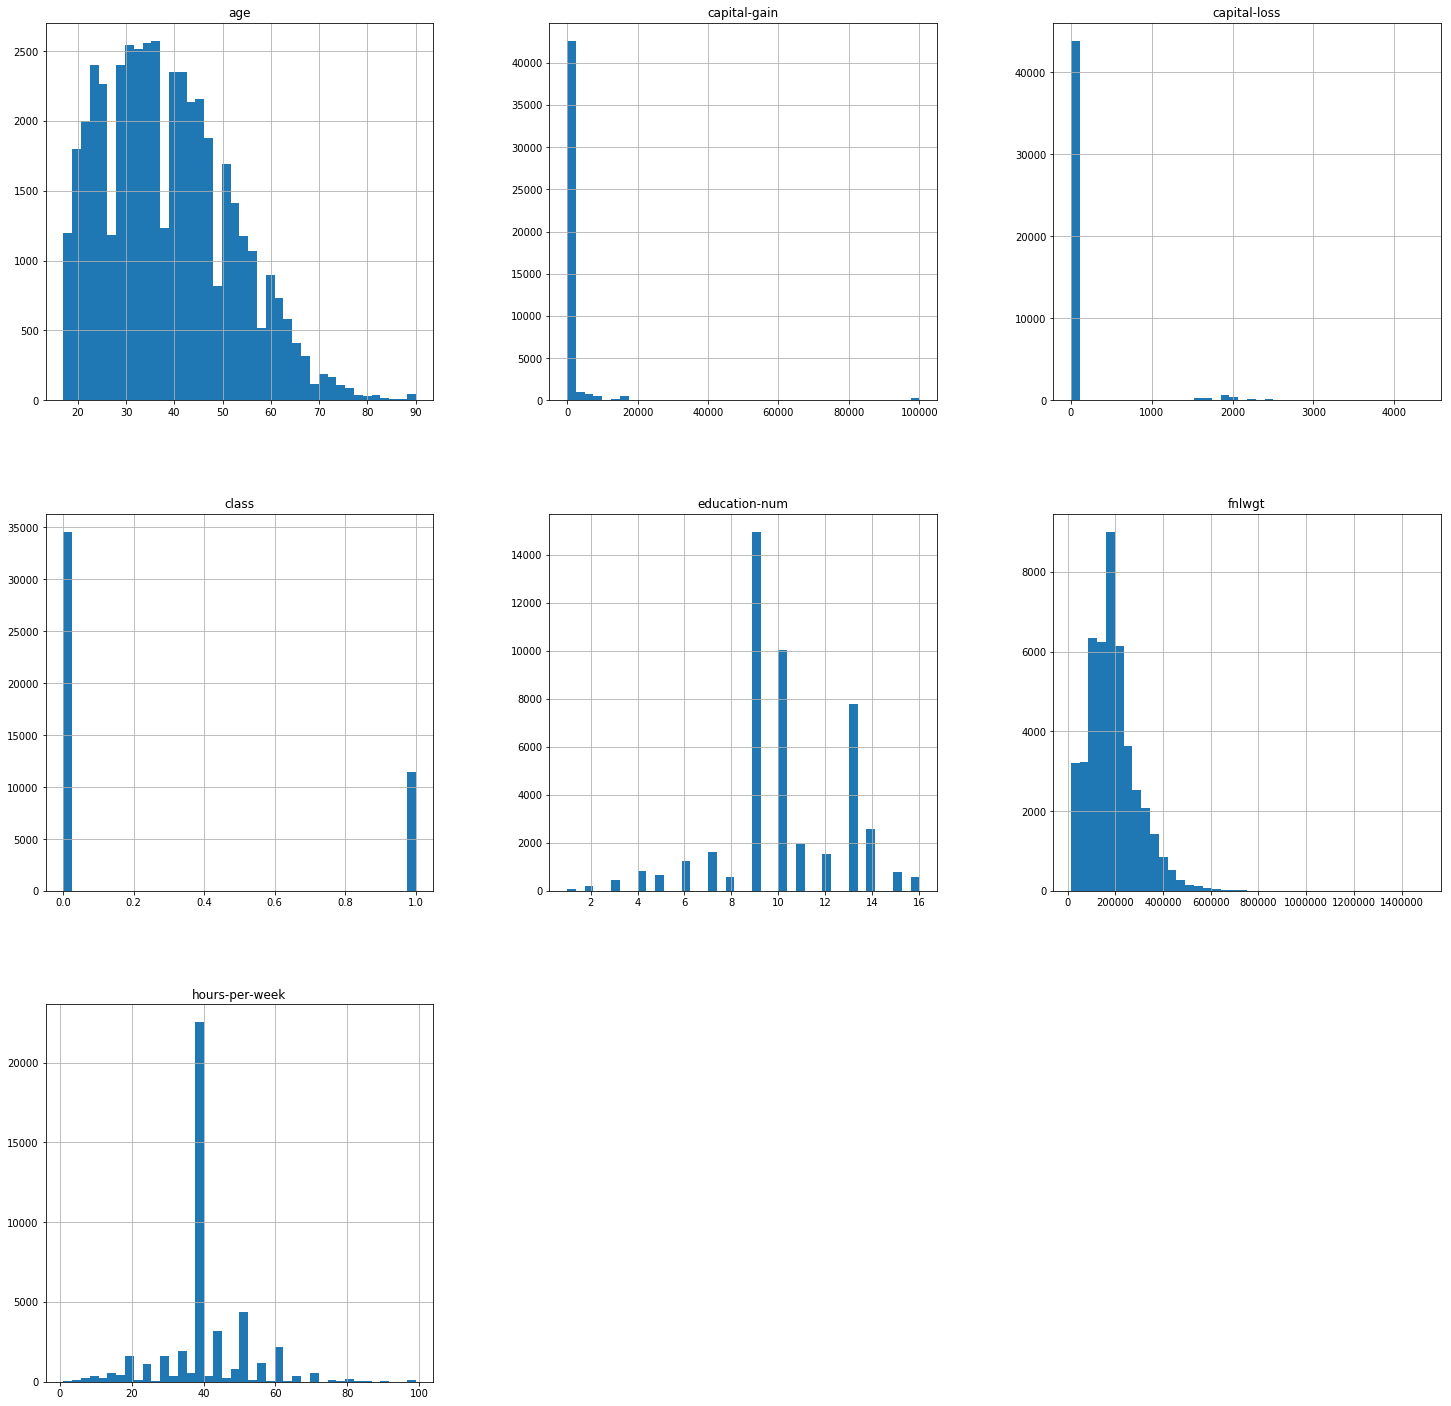

In [13]:
data.hist(figsize=(25,25), bins=40);

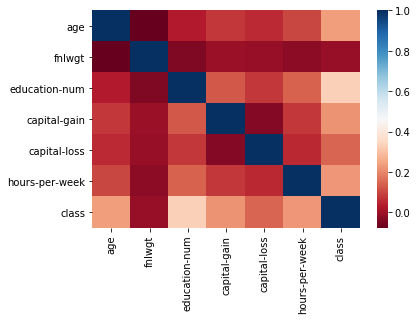

In [14]:
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap='RdBu')

### Criação do dataset de validação 

(46033, 57)


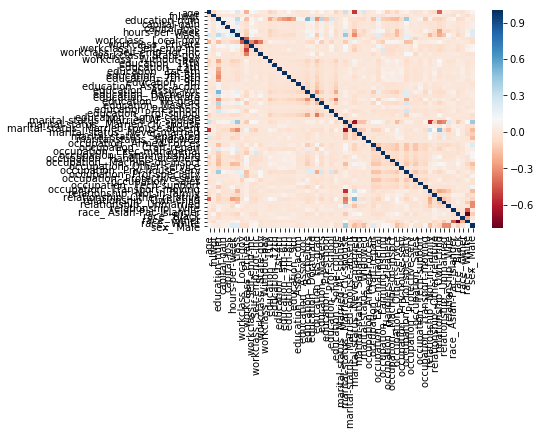

In [16]:
data2 = pd.get_dummies(data, drop_first=True)
print (data2.shape)
corr = data2.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap='RdBu')

In [17]:
dataset = data2.values
print(dataset)

[[    39  77516     13 ...      0      1      1]
 [    50  83311     13 ...      0      1      1]
 [    38 215646      9 ...      0      1      1]
 ...
 [    38 374983     13 ...      0      1      1]
 [    44  83891     13 ...      0      0      1]
 [    35 182148     13 ...      0      1      1]]


In [18]:
X, y = data2[[c for c in data2.columns if c != 'class' ]].values, data2['class'].values

In [19]:
print (y)

[0 0 0 ... 0 0 1]


### Criação dos modelos

#### Classificadores utilizados:

- DecisionTreeClassifier
- SVC
- KNN
- Logistic Regression
- Naive Bayes
- SGDClassifier
- RandomForest
- GradientBoosting

In [24]:
resultados = {}
resultados['DTC'] = { 'model': DecisionTreeClassifier() }
#resultados['SVC'] = { 'model': SVC() }
#resultados['KNN'] = { 'model': KNeighborsClassifier() }
resultados['LOR'] = { 'model': LogisticRegression() }
resultados['NB'] = { 'model':  GaussianNB() }
#resultados['SGD'] = { 'model': SGDClassifier(max_iter=1000) }
resultados['RF'] = { 'model': RandomForestClassifier() }
resultados['GB'] = { 'model': GradientBoostingClassifier() }

In [25]:
#norm = MinMaxScaler()
std = StandardScaler()
kfold = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
for key in resultados:
    print('processando {}...'.format(key))
    accuracys_std = []
    for idx_train, idx_test in kfold.split(X,y):
        X_train, X_test, y_train, y_test = X[idx_train], X[idx_test],y[idx_train], y[idx_test]
        X_train_std = std.fit_transform(X_train)
        X_test_std = std.transform(X_test)
        resultados[key]['model'].fit(X_train_std, y_train)
        y_pred_std = resultados[key]['model'].predict(X_test_std)
        accuracys_std.append(accuracy_score(y_test, y_pred_std))
    resultados[key]['accuracy_std'] = np.mean(accuracys_std)

processando DTC...
processando LOR...
processando NB...
processando RF...
processando GB...


In [26]:
df_T = pd.DataFrame(resultados).T
df_T = df_T[ ['accuracy_std'] ]
df_T

,accuracy_std
DTC,0.809572
GB,0.863142
LOR,0.847718
NB,0.691415
RF,0.844329


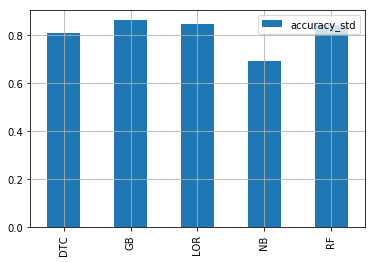

In [27]:
df_T.plot(kind='bar', grid=True);